<a href="https://colab.research.google.com/github/Mariano1985-design/Data-Science-I---84650/blob/main/PrecioPropiedades_Foletto_84650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
El dataset contiene precios de venta de casas para el condado de King, que incluye Seattle. Incluye casas vendidas entre mayo de 2014 y mayo de 2015.</font>

Este análisis tiene como objetivo entender la relación del precio y las variables descriptas en el dataset, poder tener un valor de referencia que permita poder estimar precios por tipo de propiedad.</font>

Elegi este dataset para luego poder aplicar esto en casos prácticos en mi trabajo, por ejemplo entender como relacionar multivariables y poder identificar como cada una impacta en el resultado.</font>

#  Preguntas e Hipótesis
Con las variables disponibles se encontrara un patrón para poder predecir el precio de una casa.

La principal variable que influye en el precio de la propiedad son los m2.

Entender si la antigüedad de la casa influye en un menor precio de la propiedad y cuánto es la relación.

Hipótesis Nula (H0): Las características disponibles (m2, habitaciones, baños, año de construcción, etc.) no son suficientes para predecir el precio de la casa con una precisión significativamente mejor que el azar.

Hipótesis Alternativa (H1): Es posible construir un modelo utilizando las características disponibles que prediga el precio de las casas significativamente superiores al 50% (azar).

# Análisis del dataset

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.3f}'.format

In [223]:
# Importación de archivo csv que esta guardado en Github
url = 'https://raw.githubusercontent.com/Mariano1985-design/Data-Science-I---84650/main/kc_house_data.csv'
df_casas = pd.read_csv(url)
print(df_casas.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  

Diccionario columnas


*   Id = id para cada registro
*   date = fecha
*   price = precio
*   bedrooms = habitaciones
*   bathrooms = baños
*   sqft_living = pies cuadrados de vivienda
*   sqfl_lot = pies cuadrados de terreno
*   floors = pisos
*   waterfront = frente al mar
*   view = vista
*   condition = condición
*   grade = calificación
*   sqft_above = pies cuadrados sobre el nivel del suelo
*   sqft_basement = pies cuadrados del sótano
*   yr_built = año construcción
*   yr_renovated = año de renovación
*   zipcode = código postal
*   lat = latitud
*   long = longitud
*   sqft_living15 = pies cuadrados de vivienda 15
*   sqft_lot15 = pies cuadrados de lote 15

In [228]:
# Información general del DataFrame (tipos de datos, nulos, etc.)
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [225]:
# Ver las columnas disponibles
print(f"\nColumnas: {df_casas.columns.tolist()}")


Columnas: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [226]:
# Cantidad de filas y columnas del dataframe
print(f"\nDimensiones del DataFrame: {df_casas.shape}")


Dimensiones del DataFrame: (21613, 21)


In [227]:
# Cambio a date como datatime
df_casas['date'] = pd.to_datetime(df_casas['date'])
df_casas.dtypes['date']

dtype('<M8[ns]')

In [229]:
#Descripción general del dataframe
df_casas.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,2014-10-29 04:38:01.959931648,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
min,1000102.00,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,2014-07-22 00:00:00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,2014-10-16 00:00:00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,2015-02-17 00:00:00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,2015-05-27 00:00:00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00
std,2876565571.31,NaN,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18


In [230]:
# No se advierten valores nulos en las columnas
print("Conteo de valores nulos por columna:")
print(df_casas.isnull().sum())

Conteo de valores nulos por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


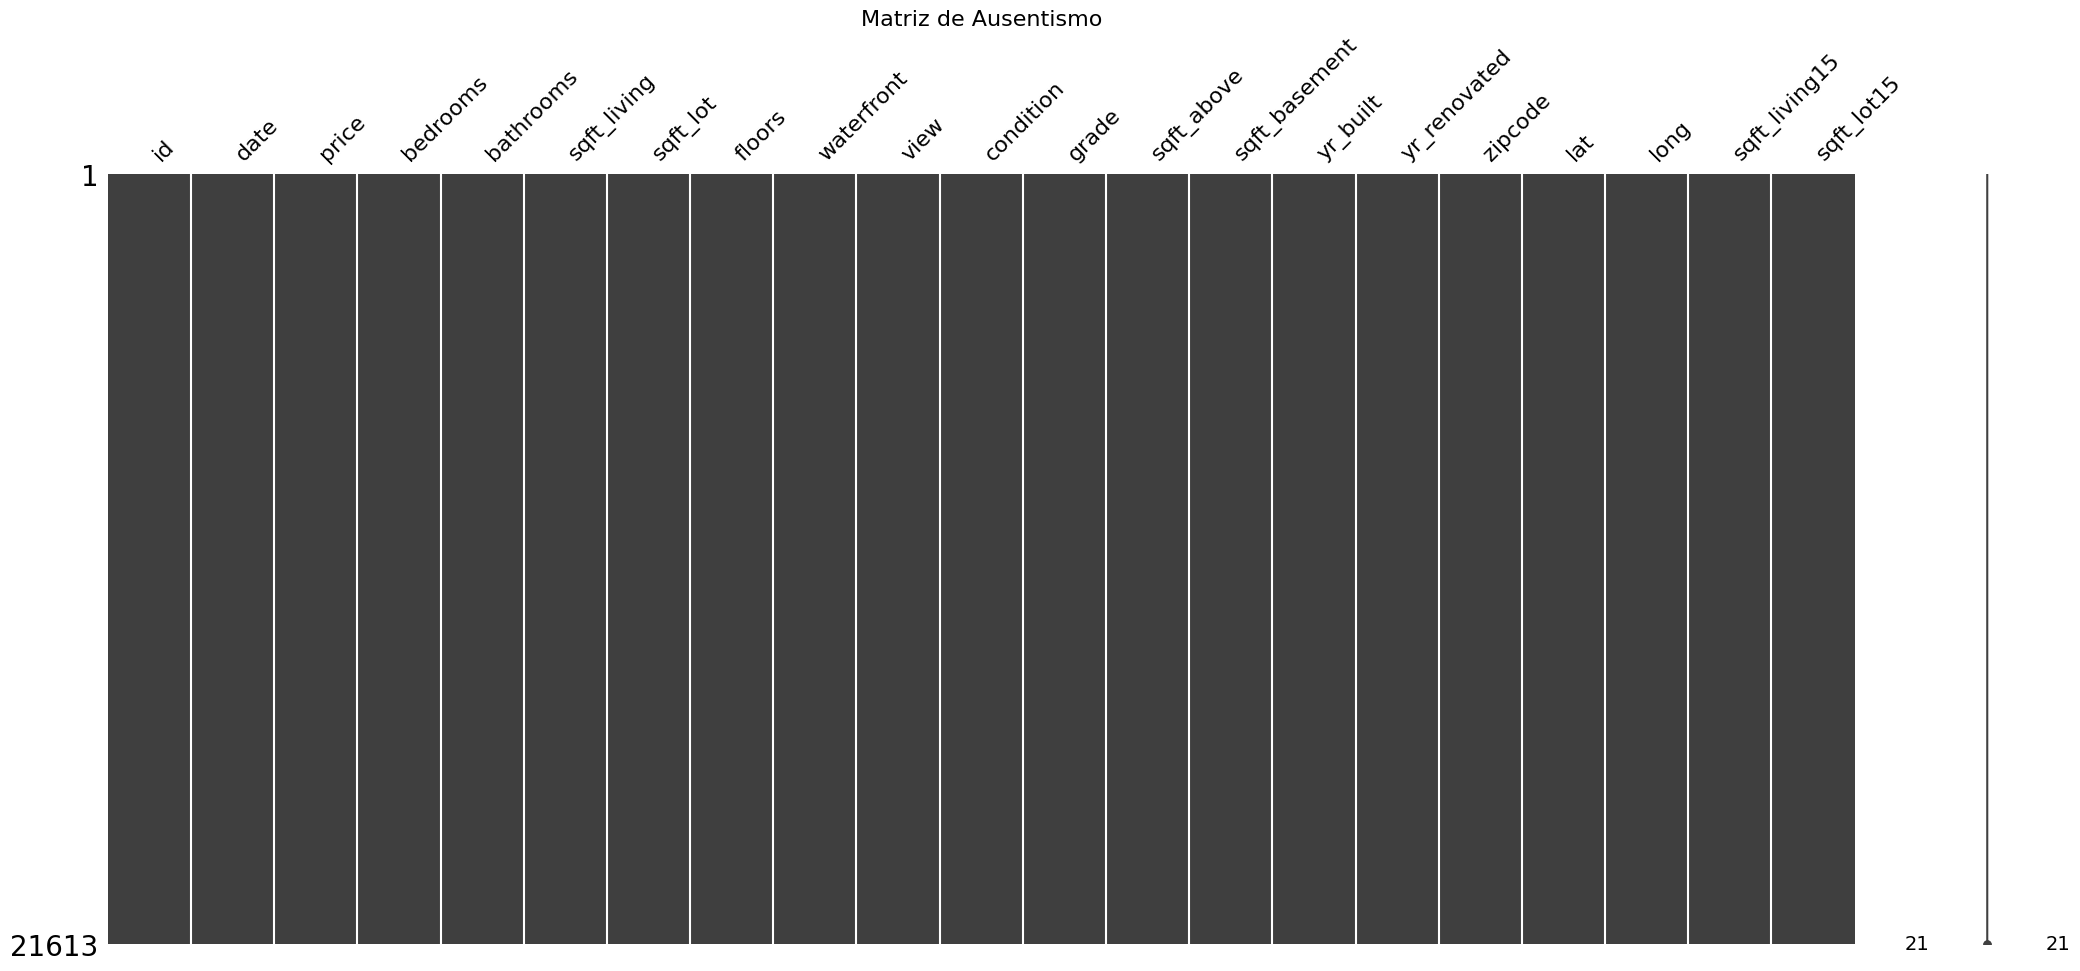

In [231]:
# No se advierten valores nulos en las columnas
msno.matrix(df_casas)
plt.title('Matriz de Ausentismo', fontsize=16)
plt.show()

# Estadisticas y Gráficos

In [219]:
# Calculo del promedio, mediana, moda y desviación estandar del precio de las propieadas
promedio_precio = df_casas['price'].mean()
mediana_precio = df_casas['price'].median()
moda_precio = df_casas['price'].mode()
desviacion_estandar_precio = df_casas['price'].std()
min_precio = df_casas['price'].min()
max_precio = df_casas['price'].max()
rango_precio = max_precio - min_precio
varianza_precio = df_casas['price'].var()


print(f"El promedio del precio es: {promedio_precio}")
print(f"La mediana del precio es: {mediana_precio}")
print(f"La moda del precio es:\n{moda_precio}")
print(f"La desviación estándar del precio es: {desviacion_estandar_precio}")
print(f"Precio Mínimo: {min_precio}")
print(f"Precio Máximo: {max_precio}")
print(f"Rango del Precio: {rango_precio}")
print(f"Varianza del Precio: {varianza_precio:.2f}")


El promedio del precio es: 540088.1417665294
La mediana del precio es: 450000.0
La moda del precio es:
0   350,000.000
1   450,000.000
Name: price, dtype: float64
La desviación estándar del precio es: 367127.1964826997
Precio Mínimo: 75000.0
Precio Máximo: 7700000.0
Rango del Precio: 7625000.0
Varianza del Precio: 134782378397.25


In [220]:
Q1_precio = df_casas['price'].quantile(0.25) # 0.25 para el 25% (Q1)
Q3_precio = df_casas['price'].quantile(0.75) # 0.75 para el 75% (Q3)
IQR_precio = Q3_precio - Q1_precio
print(f"Primer Cuartil (Q1) de Precios: {Q1_precio}")
print(f"Tercer Cuartil (Q3) de Precios: {Q3_precio}")
print(f"Rango Intercuartílico (IQR) de Precios: {IQR_precio:.2f}")

Primer Cuartil (Q1) de Precios: 321950.0
Tercer Cuartil (Q3) de Precios: 645000.0
Rango Intercuartílico (IQR) de Precios: 323050.00


In [221]:
pd.options.display.float_format = '{:.2f}'.format
print(df_casas['price'].describe())

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64


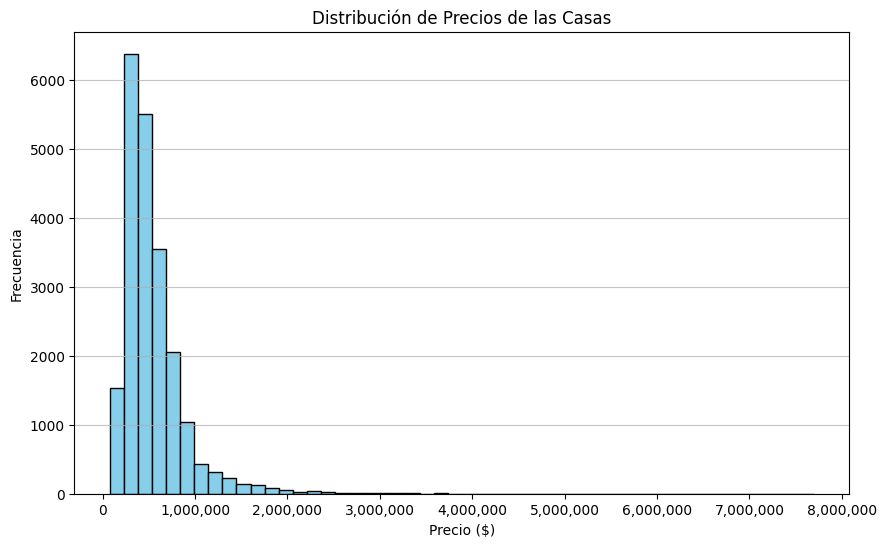

In [278]:
from matplotlib.ticker import FuncFormatter # Importa FuncFormatter
plt.figure(figsize=(10, 6))
plt.hist(df_casas['price'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribución de Precios de las Casas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# 1. Define la función de formato
def format_miles(x, pos):
    'El formato para las etiquetas del eje X'
    return '{:,.0f}'.format(x)

# 2. Aplica el formato al eje X
formatter = FuncFormatter(format_miles)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

# Con este gráfico puede obervarse que los precios de las casa se encuentran mayormente entre 0 y 1 millones.

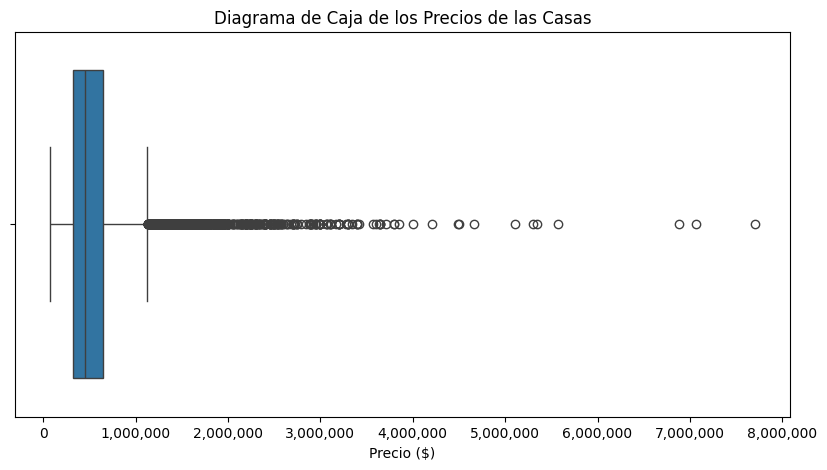

In [273]:
# Crea la función de formato para los miles
def format_miles(x, pos):
    """Función que formatea los números con comas para los miles."""
    return f'{x:,.0f}'

# Crea el gráfico
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_casas['price'])
plt.title('Diagrama de Caja de los Precios de las Casas')
plt.xlabel('Precio ($)')

# Aplica el formato al eje X
formatter = FuncFormatter(format_miles)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

# Con este gráfico puede obervarse que los precios de las casa se encuentran mayormente entre 0 y 1 millones, igual a lo visto en el gráfico anterior.

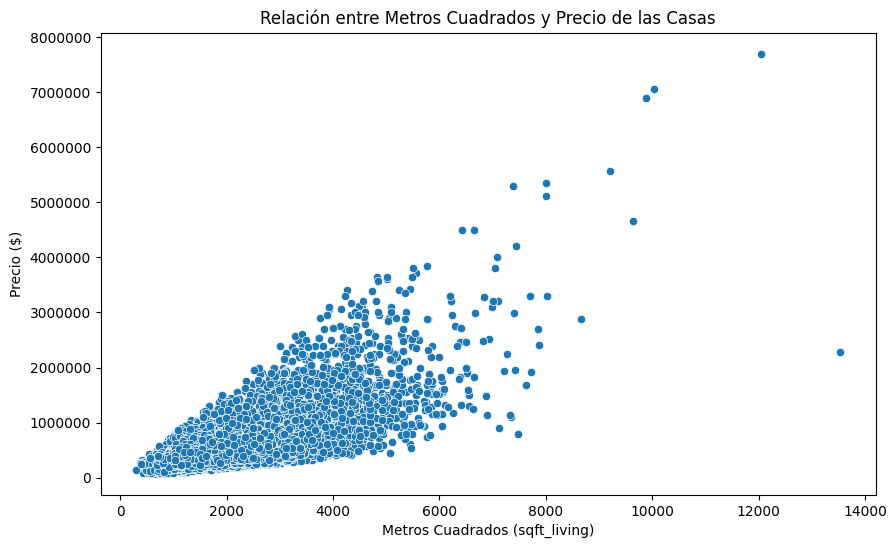

In [234]:
# Configura las opciones para que los números no usen notación científica y tengan comas
pd.options.display.float_format = '{:,.0f}'.format

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_casas)

# Agrega los títulos y etiquetas
plt.title('Relación entre Metros Cuadrados y Precio de las Casas')
plt.xlabel('Metros Cuadrados (sqft_living)')
plt.ylabel('Precio ($)')

# Para los ejes con números grandes, es recomendable ajustar el formato
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Existente una relación evidente entre los m2 y el precio de las casas.

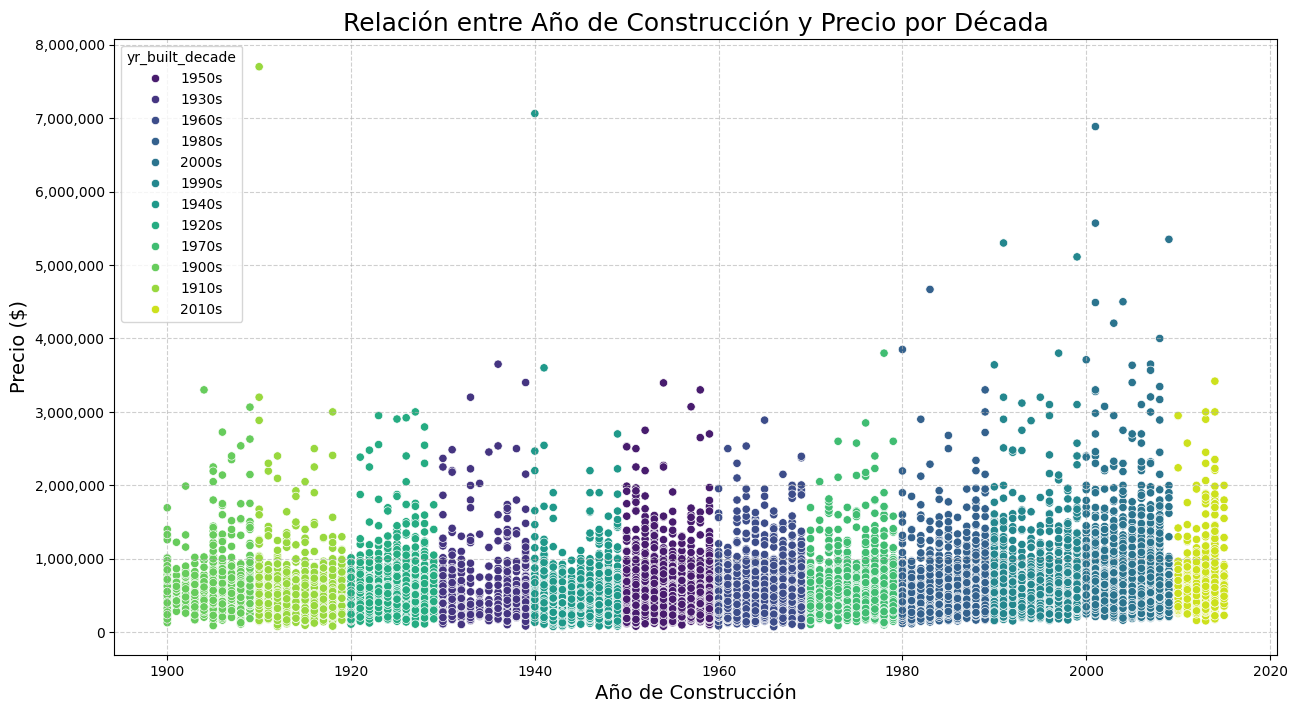

In [276]:
# 1. Agrupa los años de construcción en categorías de 10 años
df_casas['yr_built_decade'] = (df_casas['yr_built'] // 10) * 10
df_casas['yr_built_decade'] = df_casas['yr_built_decade'].astype(str) + 's'

# 2. Crea la función de formato para los miles
def format_miles(x, pos):
    return f'{x:,.0f}'

# 3. Crea el gráfico de dispersión con las décadas como color
plt.figure(figsize=(15, 8))
sns.scatterplot(x='yr_built', y='price', hue='yr_built_decade', data=df_casas, palette="viridis")

# 4. Agrega los títulos y etiquetas
plt.title('Relación entre Año de Construcción y Precio por Década', fontsize=18)
plt.xlabel('Año de Construcción', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)

# 5. Aplica el formato al eje Y
formatter = FuncFormatter(format_miles)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

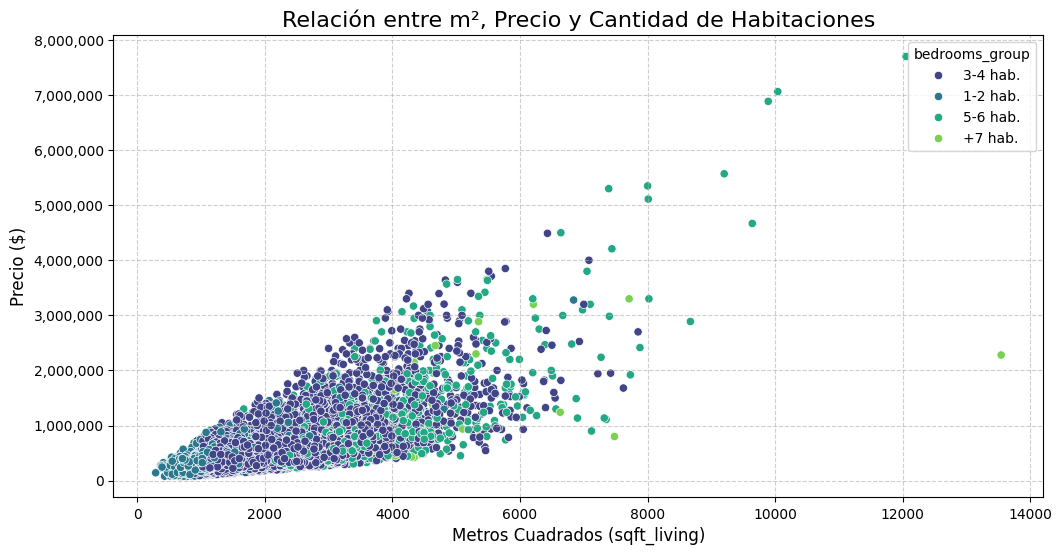

In [272]:
# 1. Define la función de agrupación de habitaciones
def agrupar_habitaciones(num):
    if num <= 2:
        return '1-2 hab.'
    elif num <= 4:
        return '3-4 hab.'
    elif num <= 6:
        return '5-6 hab.'
    else:
        return '+7 hab.'

df_casas['bedrooms_group'] = df_casas['bedrooms'].apply(agrupar_habitaciones)

# 2. Define la función de formato para los miles
def format_miles(x, pos):
    """Función que formatea los números con comas para los miles, sin decimales."""
    return f'{x:,.0f}'

# 3. Crea el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', hue='bedrooms_group', data=df_casas, palette='viridis')

# 4. Agrega los títulos y etiquetas
plt.title('Relación entre m², Precio y Cantidad de Habitaciones', fontsize=16)
plt.xlabel('Metros Cuadrados (sqft_living)', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)

# 5. Aplica el formato al eje Y para que muestren los números completos
formatter = FuncFormatter(format_miles)
plt.gca().yaxis.set_major_formatter(formatter)

# 6. Muestra el gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

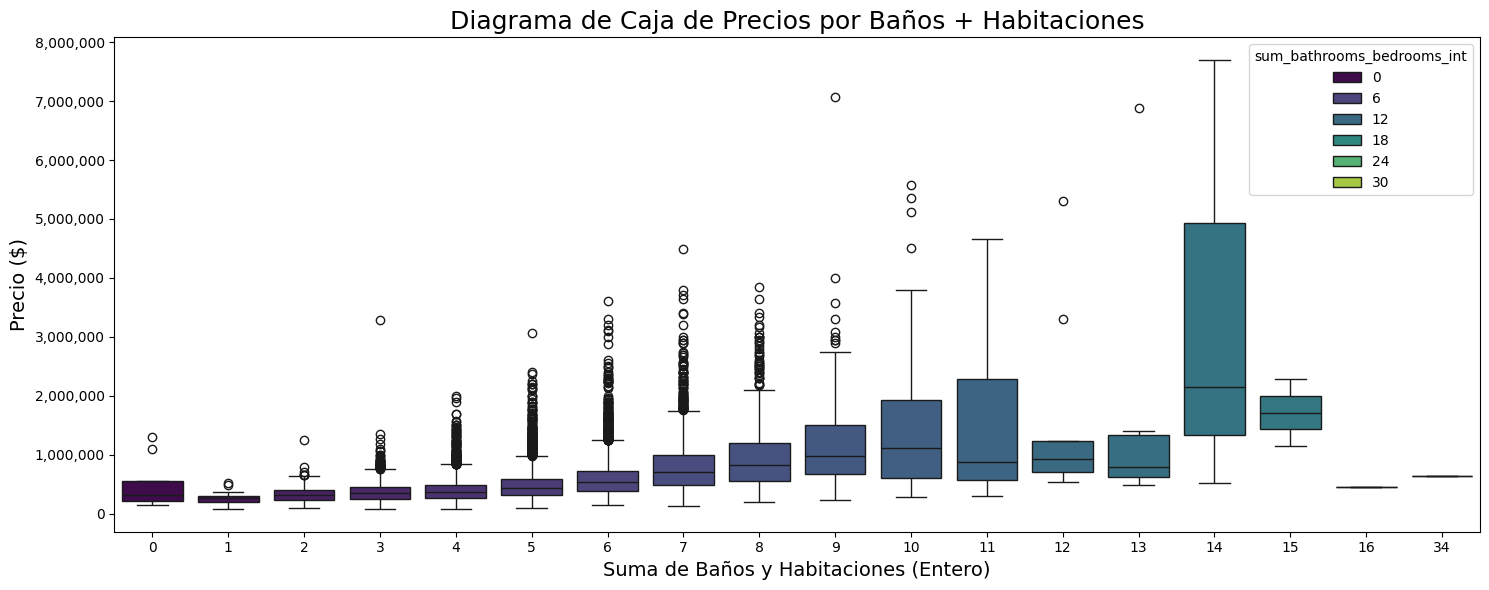

In [271]:
# 1. Crea una nueva columna que sume los baños y las habitaciones
df_casas['sum_bathrooms_bedrooms'] = df_casas['bathrooms'] + df_casas['bedrooms']

# 2. Convierte la columna a tipo entero para que las categorías sean claras
df_casas['sum_bathrooms_bedrooms_int'] = df_casas['sum_bathrooms_bedrooms'].astype(int)

# 3. Define la función de formato para los miles en el eje Y (Precios)
def format_miles(x, pos):
    """Función que formatea los números con comas para los miles, sin decimales."""
    return f'{x:,.0f}'

# 4. Crea el gráfico de caja
plt.figure(figsize=(15, 6))
sns.boxplot(x='sum_bathrooms_bedrooms_int', y='price', data=df_casas, hue='sum_bathrooms_bedrooms_int', palette="viridis")

# 5. Agrega los títulos y etiquetas
plt.title('Diagrama de Caja de Precios por Baños + Habitaciones', fontsize=18)
plt.xlabel('Suma de Baños y Habitaciones (Entero)', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)

# 6. Aplica el formato al eje Y
formatter = FuncFormatter(format_miles)
plt.gca().yaxis.set_major_formatter(formatter)

# 7. Muestra el gráfico
plt.tight_layout()
plt.show()



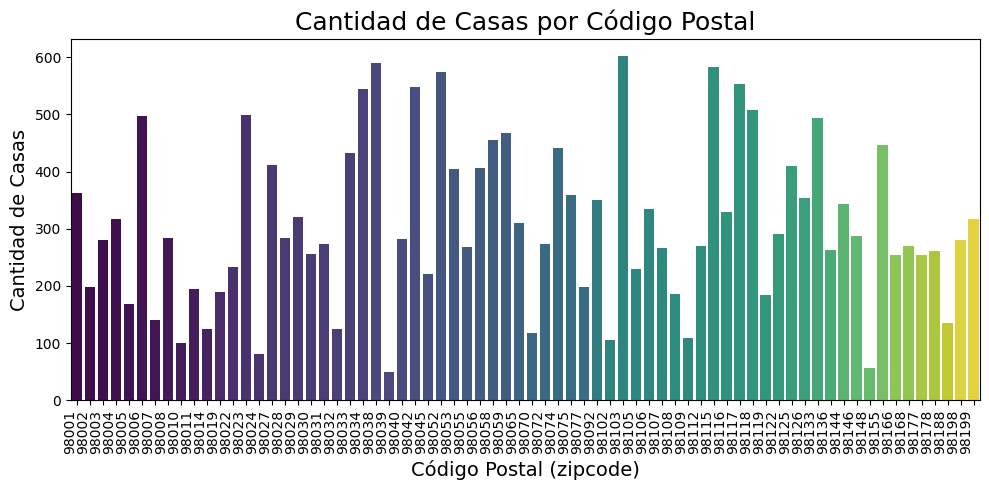

In [268]:
# 1. Cuenta la cantidad de casas por cada código postal
conteo_zipcode = df_casas['zipcode'].value_counts()

# 2. Crea el gráfico de barras, ahora con el parámetro 'hue'
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_zipcode.index, y=conteo_zipcode.values, hue=conteo_zipcode.index, palette="viridis", legend=False)

# 3. Agrega los títulos y etiquetas
plt.title('Cantidad de Casas por Código Postal', fontsize=18)
plt.xlabel('Código Postal (zipcode)', fontsize=14)
plt.ylabel('Cantidad de Casas', fontsize=14)

# 4. Ajusta la rotación de las etiquetas del eje X para mejor lectura
plt.xticks(rotation=90, ha='right', fontsize=10)

# 5. Ajusta el diseño para que todo quepa en la ventana
plt.tight_layout()
plt.show()


In [264]:
import folium
from folium.plugins import HeatMap

# Suponiendo que tu DataFrame se llama df_casas y tiene las columnas 'lat' y 'long'

# 1. Crea un mapa base centrado en una ubicación relevante (por ejemplo, Seattle)
# Ajusta las coordenadas (latitud, longitud) y el nivel de zoom
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# 2. Prepara los datos para el mapa de calor
# El plugin HeatMap necesita una lista de listas con [latitud, longitud]
heat_data = [[row['lat'], row['long']] for index, row in df_casas.iterrows()]

# 3. Agrega el mapa de calor al mapa base
HeatMap(heat_data).add_to(m)

# 4. Muestra el mapa en la salida de Colab
m

# Conclusiones Preliminares